<a href="https://colab.research.google.com/github/ibonetc/VisionAPI_TensorFlow_Python/blob/master/Ejemplo_Clasificar_Imagenes_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo sencillo utilizando TensorFlow
Aquí se entrena una red neuronal para clasificar imágenes de ropa.
Se utiliza ***tf.keras***, una API para construir modelos en TensorFlow

In [0]:
#from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)

2.2.0-rc2
2.3.0-tf


## Base de datos MNIST
Esta base de datos tiene varias imágenes de 10 tipos de ropa:

<table>
  <tr>
    <th>Label</th>    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>    <td>Ankle boot</td> 
  </tr>
</table>

La base tiene 60000 ejemplos de entrenamiento y 10000 de prueba.
Al descargar esta base de datos se retornan 4 arreglos Numpy:

Arreglo con imágenes de entrenamiento
Arreglo con clases de entrenamiento
Arreglo con imágenes de prueba
Arreglo con clases de imágenesde prueba
Las imágenes son de 28x28 pixeles, los que tienen valores en un rango de 0 a 255.


Al descargar esta base de datos se retornan 4 arreglos Numpy:


1.   Arreglo con imágenes de entrenamiento
2.   Arreglo con clases de entrenamiento
3.   Arreglo con imágenes de prueba
4.   Arreglo con clases de imágenesde prueba

Las imágenes son de 28x28 pixeles, los que tienen valores en un rango de 0 a 255.

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Explorando los datos:

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
print(len(train_labels))
print(len(test_labels))

60000
10000


Mostrar la primera imagen de entrenamiento:

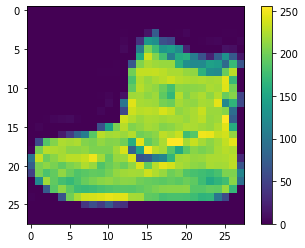

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

Mostrando las primeras 100

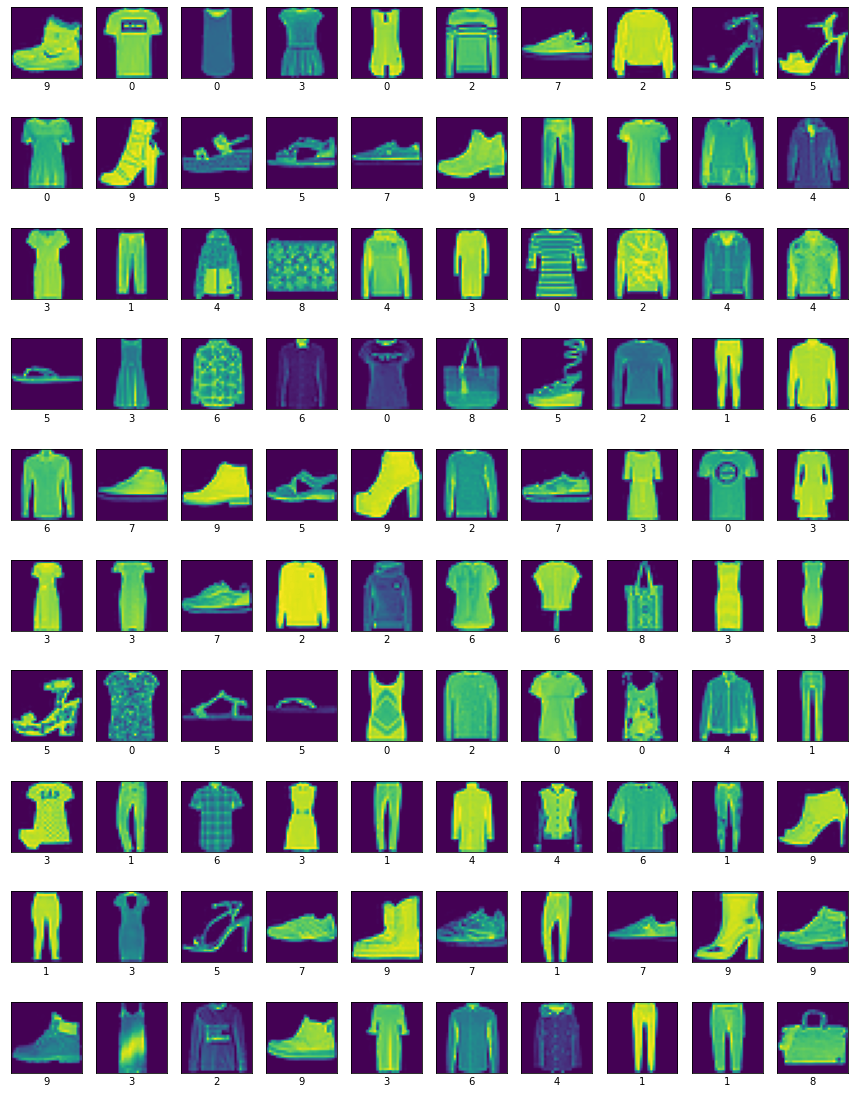

In [0]:
plt.figure(figsize=(15,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])#,cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Necesitamos un arreglo con el nombre asociado para cada una de las clases

In [0]:
class_names_english = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Botín']

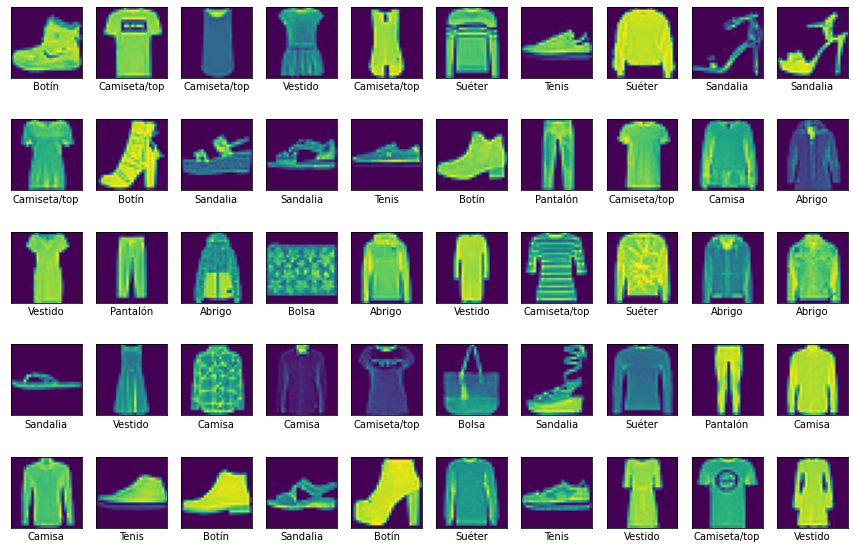

In [0]:
plt.figure(figsize=(15,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])#, cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Debemos llevar las imágenes de la escala de 0-255 a una escala entre 0 y 1

Veamos originalmente cómo es la imagen y cómo es después de escalada.

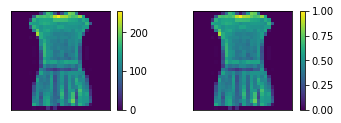

In [0]:
plt.figure()

plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[3])
plt.colorbar()

plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[3]/255.0)
plt.colorbar()

plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Construir el modelo de red neuronal
En este ejemplo vamos a utilizar *keras* que es un API desde la que se puede utilizar *tensorflow* con mayor facilidad.

Hay que definir las capas que tendrá la red neural. Existen diferentes tipos de capas.

Por ejemplo, para este modelo vamos a comenzar con una capa de tipo Flatten (*tf.keras.layers.Flatten*), este tipo de capa transforma el formato de las imágenes de una matriz 2d (de 28 x 28 píxeles) a una matriz 1d de 28 * 28 = 784 píxeles.

Otro tipo de capa es la Dense (*tf.keras.layers.Dense*).  Estas son capas neuronales totalmente conectadas. 
En el ejemplo vamos a poner una capa Dense con 128 neuronas. 
La última capa, que es la que está relacionada con la salidad de la red neuronal, tiene 10 neuronas (una por cada una de las clases) y con función de activación  *softmax*.
Esta red devuelve una matriz de 10 puntuaciones de probabilidad que suman 1, cada una asociada con una clase. 



### Creando el modelo con la API Sequential (Sequential Model)

In [0]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    # 128 neuronas con función de activación relu
    Dense(128, activation=tf.nn.relu),
    # 10 neuronas de salida con función de activación softmax
    Dense(10, activation=tf.nn.softmax) 
])

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model=Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Crando modelo con API Functional (Functional Model)

In [0]:
from tensorflow.keras import Model
from tensorflow.keras import Input

In [0]:
x_in = Input(shape=(28, 28))
x1 = Flatten()(x_in)
x2 = Dense(128, activation=tf.nn.relu)(x1)
x_out = Dense(10, activation=tf.nn.softmax)(x2)
# define the model
model = Model(inputs=x_in, outputs=x_out)

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Antes de que el modelo esté listo para el entrenamiento, necesita algunos ajustes más. Estos se agregan durante el paso *compilación* del modelo:

* *Función de pérdida*: mide la precisión del modelo durante el entrenamiento. Queremos minimizar esta función para llevar el modelo en la dirección correcta.
  Las más usadas son:



>   *   'binary_crossentropy': para clasificación binaria

>    *   'sparse_categorical_crossentropy': para clasificación multiclase.

>    *   'mse' (mean squared error)- para regresión.


* *Optimizador*: así se actualiza el modelo según los datos que ve y su función de pérdida.
* *Métricas*: se utiliza para supervisar los pasos de capacitación y pruebas. El siguiente ejemplo utiliza *precision*, la fracción de las imágenes que están clasificadas correctamente.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


Entrenar el modelo de red neuronal requiere los siguientes pasos:

1. Entrar los datos de entrenamiento al modelo; en este ejemplo, los arreglos *train_images* y *train_labels*.
2. El modelo aprende a asociar imágenes y clases.
3. Le pedimos al modelo que haga predicciones sobre un conjunto de pruebas; en este ejemplo, la matriz *test_images*. Verificamos que las predicciones coincidan con las clases de la matriz *test_labels*.

Para comenzar el entrenamiento, llame al método `model.fit`: 

In [0]:
history=model.fit(train_images, train_labels, epochs=50)

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4936 - acc: 0.8256
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3741 - acc: 0.8639
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3337 - acc: 0.8791
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3109 - acc: 0.8861
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - acc: 0.8925
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - acc: 0.8956
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2676 - acc: 0.9021
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - acc: 0.9051
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - acc: 0.9061
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2374 - acc: 0.9112
Epoch 11/100
1875/1

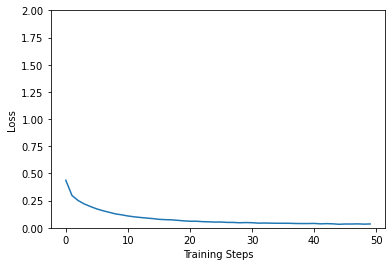

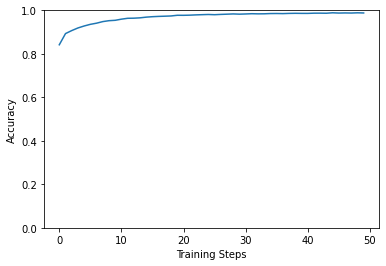

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(history.history['loss'])

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(history.history['acc'])

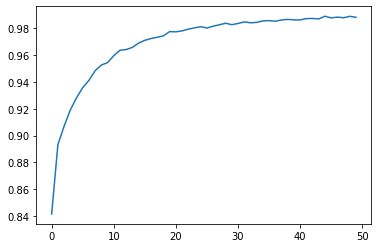

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['acc'])

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])

batch_stats = CollectBatchStats()

In [0]:
history=model.fit(train_images, train_labels, epochs=5, callbacks = [batch_stats])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - acc: 0.9809
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - acc: 0.9804
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0500 - acc: 0.9812
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0482 - acc: 0.9822
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0502 - acc: 0.9812


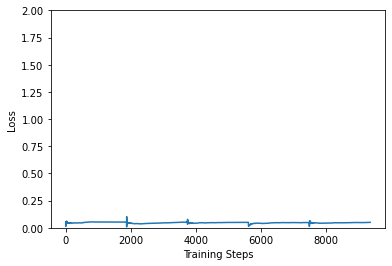

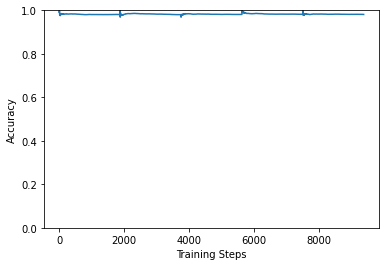

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

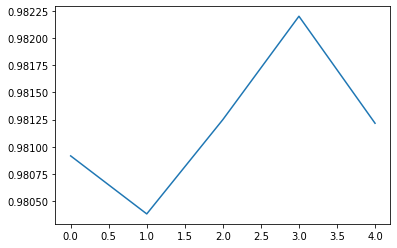

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['acc'])

## Evaluar el modelo

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.8867 - acc: 0.8799


## Predecir ejemplos

In [0]:
predictions = model.predict(test_images)

`predictions` es un arreglo con la probabilidad de pertenecer a cada una de las clases, para cada uno de los casos en el arreglo de `test_images`.

In [0]:
predictions[0]

array([2.9147922e-28, 8.2589239e-29, 2.7013611e-29, 0.0000000e+00,
       2.2803102e-35, 2.2014935e-13, 2.1366316e-32, 1.1095436e-11,
       2.4684422e-30, 1.0000000e+00], dtype=float32)

De forma que el mayor será el correspondiente a la clase

In [0]:
np.argmax(predictions[0])

9

Text(0.5, 0, 'Botín 14% (Botín)')

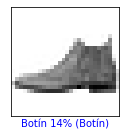

In [0]:
index_image=0
plt.figure(figsize=(2,2))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(test_images[index_image], cmap=plt.cm.binary)

predicted_label = np.argmax(predictions[index_image])
color= 'blue' if predicted_label == test_labels[index_image] else 'red'
plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                              100*np.max(predictions[index_image]),
                              class_names[test_labels[index_image]]),
                              color=color)

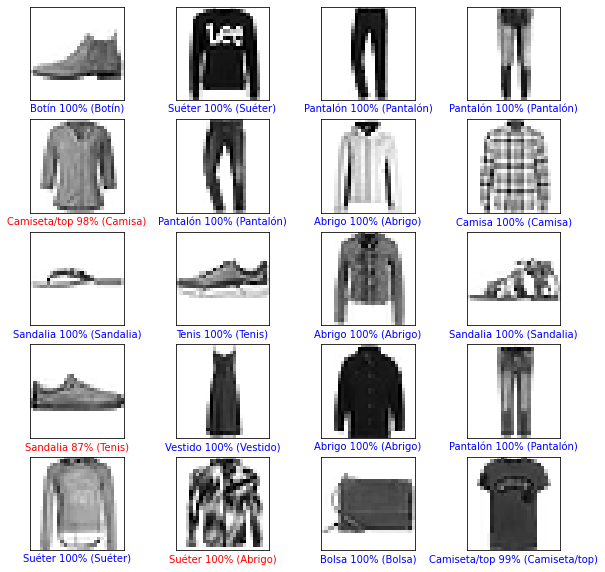

In [0]:
plt.figure(figsize=(10,10))
for index_image in range(20):
  plt.subplot(5, 4, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[index_image], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[index_image])
  color= 'blue' if predicted_label == test_labels[index_image] else 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions[index_image]),
                                class_names[test_labels[index_image]]),
                                color=color)

### Predecir una sola imagen
Si tenemos una imagen y queremos usar este modelo para predecirla, entonces debemos primero poner la imagen un formato para poder ser predicha.

In [0]:
img = test_images[0]
print(img.shape)

(28, 28)


In [0]:
img = test_images[0]
print(img.shape)
img = (np.expand_dims(img,0)) #Extender dimensiones
print(img.shape)

(28, 28)
(1, 28, 28)


In [0]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.9147811e-28 8.2589239e-29 2.7013611e-29 0.0000000e+00 2.2803276e-35
  2.2014935e-13 2.1366316e-32 1.1095414e-11 2.4684234e-30 1.0000000e+00]]


In [0]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


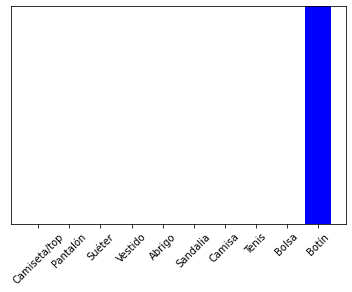

In [0]:
plt.grid(False)
thisplot = plt.bar(range(10), predictions_single[0], color="gray")
plt.ylim([0, 1]) 
predicted_label = np.argmax(predictions_single[0])
thisplot[predicted_label].set_color('red')
thisplot[test_labels[0]].set_color('blue')
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
plt.show()

## Guardar el modelo

In [0]:
model.save('/content/drive/My Drive/AWS/my_model.h5')

## Volver a cargar el modelo

In [0]:
new_model = keras.models.load_model('/content/drive/My Drive/AWS/my_model.h5')
new_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Probando el modelo cargado

In [0]:
lossI, accI = model.evaluate(train_images, train_labels)
loss, acc = new_model.evaluate(train_images, train_labels)
print("Modelo original, accuracy: {:5.2f}%".format(100*accI))
print("Modelo cargado, accuracy: {:5.2f}%".format(100*acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0685 - acc: 0.9742
Modelo original, accuracy: 97.42%
Modelo cargado, accuracy: 97.42%


Si queremos descargar el modelo creado:

In [0]:
from google.colab import files
files.download('my_model.h5')

Para volver a cargarlo desde el disco

In [0]:
from google.colab import files
uploaded = files.upload()

### Otro modelo de red: Redes convoluciones


Este tipo de capas necesita una entrada de tres dimensiones, por lo que es necesario hacer un reshape de las imágenes.

In [0]:
x_train_c = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
x_test_c = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

In [0]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

In [0]:
input_shape=x_test_c.shape[1:4]
input_shape

(28, 28, 1)

In [0]:
input_shape=x_test_c.shape[1:4]
modelc = Sequential()
modelc.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
modelc.add(MaxPooling2D(pool_size=(2, 2)))
modelc.add(Flatten()) # Flattening the 2D arrays for fully connected layers
modelc.add(Dense(128, activation=tf.nn.relu))
modelc.add(Dropout(0.2))
modelc.add(Dense(10,activation=tf.nn.softmax))

In [0]:
from tensorflow.keras import metrics

In [0]:
modelc.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [0]:
history=modelc.fit(x_train_c,train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4185 - acc: 0.8494
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - acc: 0.8974
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2358 - acc: 0.9128
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2067 - acc: 0.9239
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1808 - acc: 0.9323
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - acc: 0.9388
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1465 - acc: 0.9456
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1329 - acc: 0.9504
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1204 - acc: 0.9555
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1114 - acc: 0.9579
Epoch 11/50
1875/1875 [======

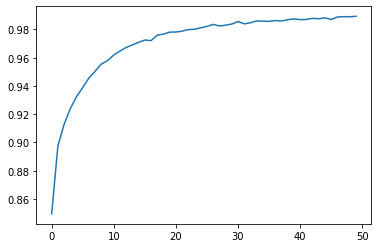

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['acc'])

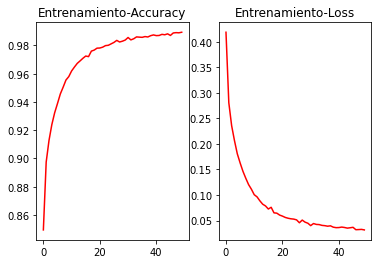

In [0]:
acc=history.history['acc']
epoch=range(len(acc))
loss=history.history['loss']
plt.figure()
plt.subplot(1,2,1)
plt.plot(epoch,acc,'red')
plt.title(label='Entrenamiento-Accuracy')
plt.subplot(1,2,2)
plt.plot(epoch,loss,'red')
plt.title(label='Entrenamiento-Loss')
plt.show()

In [0]:
from sklearn.metrics import classification_report

y_pred = modelc.predict(x_test_c)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(test_labels, y_pred_bool,np.unique(test_labels),class_names))

              precision    recall  f1-score   support

Camiseta/top       0.88      0.84      0.86      1000
    Pantalón       0.99      0.98      0.98      1000
      Suéter       0.85      0.87      0.86      1000
     Vestido       0.89      0.93      0.91      1000
      Abrigo       0.87      0.87      0.87      1000
    Sandalia       0.98      0.98      0.98      1000
      Camisa       0.76      0.75      0.75      1000
       Tenis       0.96      0.96      0.96      1000
       Bolsa       0.98      0.98      0.98      1000
       Botín       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [0]:
np.expand_dims(x_test_c[0],0).shape

(1, 28, 28, 1)

In [0]:
pred = modelc.predict(np.expand_dims(x_test_c[0],0))
print(pred.argmax())


9


##Uso de redes ya entrenadas

Ejemplo con VGG16

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from numpy import expand_dims
from tensorflow.keras.applications import imagenet_utils

In [0]:
# Cargar el modelo VGG16
model = VGG16(weights="imagenet")
# Resumen del modelo
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


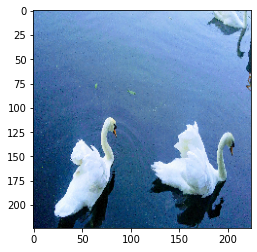

In [0]:
fileImage='/content/drive/My Drive/Ejemplos R_Otros/Fotos/cisnes.jpg'
img = load_img(fileImage, target_size=(224, 224))
plt.imshow(img)

In [0]:
# Convertir imagen a array
img = img_to_array(img)
# Expandir las dimensiones
img = expand_dims(img, axis=0)
# preparar la imagen
img = preprocess_input(img)

In [0]:
img.shape

(1, 224, 224, 3)

In [0]:
y_p=model.predict(img)

In [0]:
from tensorflow.keras.applications.vgg16 import decode_predictions
# Calcular la clase de mayor probabilidad
label = decode_predictions(y_p)
# Clase de mayor probabilidad
label = label[0][0]
print (label[1], "-", label[2])
# print the classification
print('Predicted:', decode_predictions(y_p, top=3)[0])

American_egret - 0.5878103
Predicted: [('n02009912', 'American_egret', 0.5878103), ('n02006656', 'spoonbill', 0.1422159), ('n01860187', 'black_swan', 0.06601813)]


In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img = load_img(fileImage, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01855672', 'goose', 0.5254469), ('n01819313', 'sulphur-crested_cockatoo', 0.15766263), ('n02009912', 'American_egret', 0.077423625)]


Tomar la red sin la última capa

In [0]:
modelvgg6 = VGG16(weights="imagenet", include_top=False)